In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate
from mpl_toolkits import mplot3d
from matplotlib import cm
import glob
%matplotlib inline

In [2]:
# Import all the files 
path_dem = "data/raw_datasets/DEM"
allfiles_dem = glob.glob(path_dem + '/*.txt')

In [5]:
header_dem = ["X","Y","Z"]
DEM = pd.read_csv(allfiles_dem[1],names = header_dem, delim_whitespace=True) 
DEM.head()

,X,Y,Z
0,50.0,50.0,0.00000
1,150.0,50.0,0.01922
2,250.0,50.0,-0.13374
3,350.0,50.0,-0.40252
4,450.0,50.0,-0.63374


In [6]:
# Convert dataframe to numpy array for calculation
X = DEM["X"].to_numpy()
Y = DEM["Y"].to_numpy()
Z = DEM["Z"].to_numpy()

# Num ber of grid used for spatial discritisation
N = 64

# Reshape both X and Y direction grids, forming the checkerboard-like array 
X = np.reshape(X, (N, N))
Y = np.reshape(Y, (N, N))

# Reshape the Elevation data to 64 x 64 
Z = np.reshape(Z, (N, N))

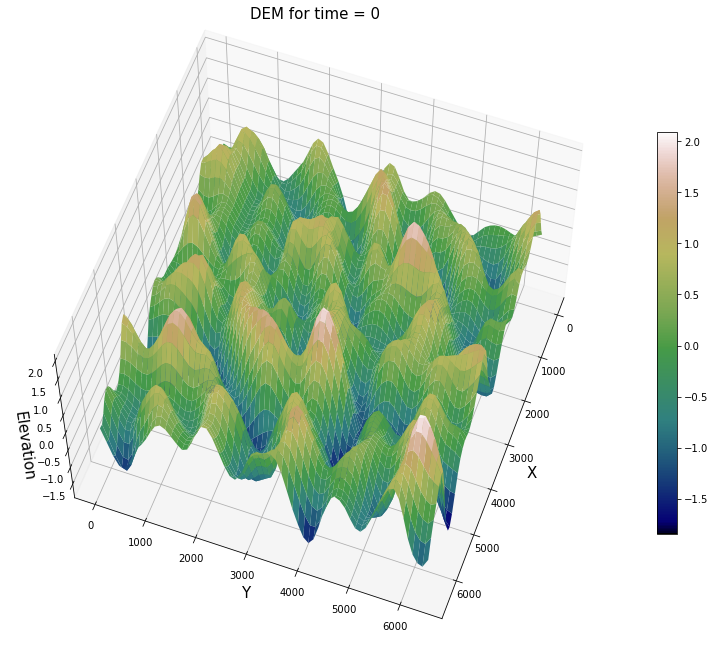

In [7]:
color_dem = cm.gist_earth
zmax = np.max(Z)
zmin = np.min(Z)
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap = color_dem, edgecolor='none',vmin=zmin, vmax=zmax)
ax.set_title('surface');
ax.view_init(60, 20)

# Set the labels and fontsize
ax.set_title('DEM for time = 0')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
ax.zaxis.get_label().set_fontsize(15)
ax.title.set_fontsize(15)

# converts the values of any array to RGB colors defined by a colormap
m = cm.ScalarMappable(cmap=color_dem)
m.set_array(Z)
plt.colorbar(m,fraction=0.03)
plt.show()

# Bivariate B-spline representation of a surface

In [8]:
tck = interpolate.bisplrep(X, Y, Z, s=0)
znew = interpolate.bisplev(X[0,:], Y[:,0], tck)

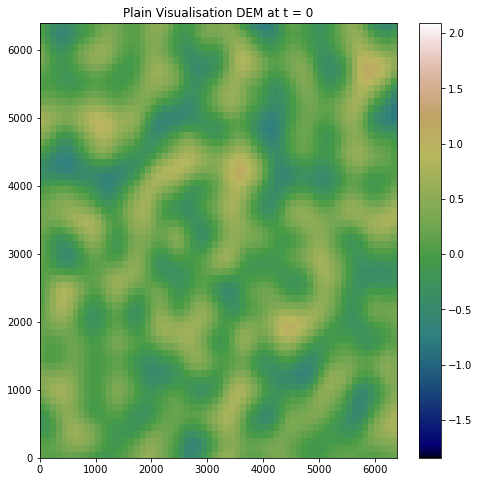

In [9]:
plt.figure(figsize = (8,8))
plt.pcolormesh(X, Y, znew, shading='auto',cmap =  cm.gist_earth,vmin=-4, vmax=4)
plt.title("Plain Visualisation DEM at t = 0")

# converts the values of any array to RGB colors defined by a colormap
s = cm.ScalarMappable(cmap=cm.gist_earth)
s.set_array(znew)
plt.colorbar(s)
plt.show()

# Water Depth Data

In [10]:
path_wd = "data/raw_datasets/WD"
allfiles_wd = glob.glob(path_wd + '/*.txt')

data/raw_datasets/WD\WD_1.txt


In [41]:
# Note that the imported wd file here has two dimension with the column value is the water depth
# Row one is the time???
data = np.loadtxt(allfiles_wd[0])
print(np.shape(data))

# Extract the water depth value
wd1 = np.reshape(data[:],(N,N))

(97, 4096)


ValueError: cannot reshape array of size 397312 into shape (64,64)

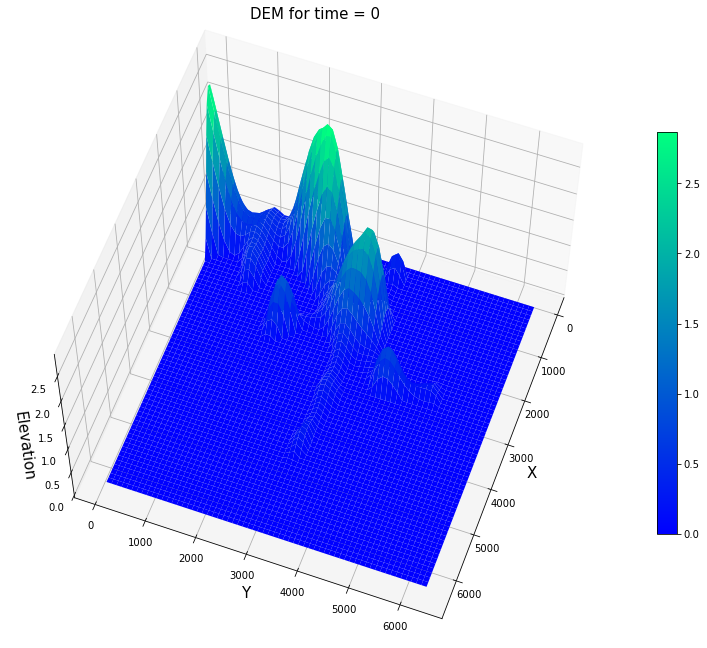

In [42]:
color_wd = 'winter'
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, wd1, rstride=1, cstride=1,cmap = color_wd, edgecolor='none')
ax.set_title('surface');
ax.view_init(60, 20)

# Set the labels and fontsize
ax.set_title('DEM for time = 0')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
ax.zaxis.get_label().set_fontsize(15)
ax.title.set_fontsize(15)

# converts the values of any array to RGB colors defined by a colormap
m = cm.ScalarMappable(cmap=color_wd)
m.set_array(wd1)
plt.colorbar(m,fraction=0.03)
plt.show()

In [ ]:
def animate(i, x=[], y=[]):
    plt.cla()
    x.append(i)
    y.append(random.randint(0, 10))
    plt.plot(x, y)


if __name__ == "__main__":
    fig = plt.figure()
    ani = FuncAnimation(fig, animate, interval=700)
    plt.show()